In [9]:
import numpy as np
from matplotlib import pyplot as plt


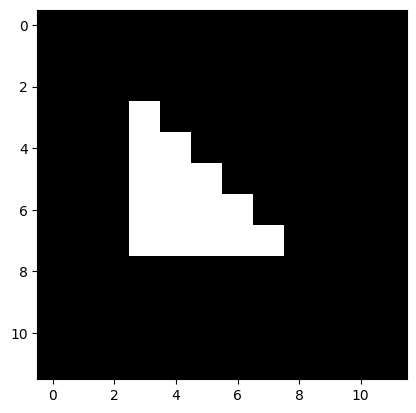

In [10]:
image = np.zeros((12, 12))
image[3, 3:4] = 1
image[4, 3:5] = 1
image[5, 3:6] = 1
image[6, 3:7] = 1
image[7, 3:8] = 1

plt.imshow(image, cmap='gray')

Text(0.5, 1.0, 'dy')

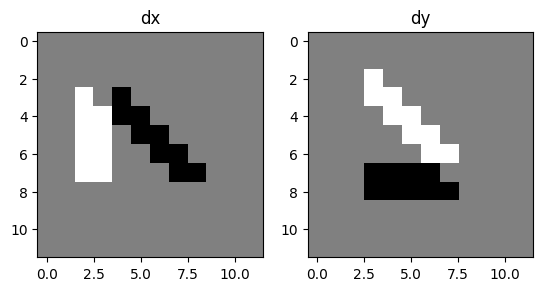

In [11]:
def derivative(image):
    dx = np.zeros_like(image)
    dy = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            dx[i, j] = image[i, j + 1] - image[i, j - 1]
            dy[i, j] = image[i + 1, j] - image[i - 1, j]
    return dx, dy

dx, dy = derivative(image)
plt.subplot(1, 2, 1)
plt.imshow(dx, cmap='gray')
plt.title('dx')
plt.subplot(1, 2, 2)
plt.imshow(dy, cmap='gray')
plt.title('dy')


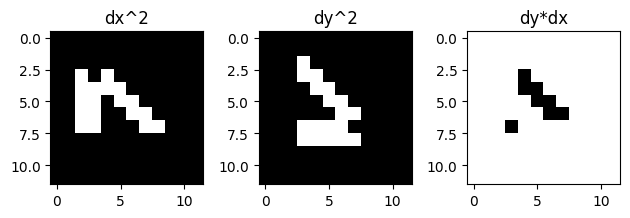

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(dx**2, cmap='gray')
plt.title('dx^2')
plt.subplot(1, 3, 2)
plt.imshow(dy**2, cmap='gray')
plt.title('dy^2')
plt.subplot(1, 3, 3)
plt.imshow(dy*dx, cmap='gray')
plt.title('dy*dx')
plt.tight_layout()
plt.show()

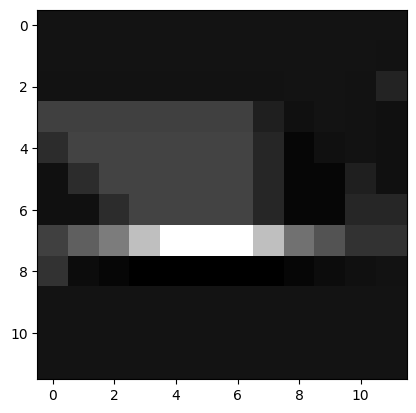

In [13]:
def harris(image, k=0.04):
    dx, dy = derivative(image)
    dx2 = dx**2
    dy2 = dy**2
    dxdy = dx*dy
    w = np.ones((3, 3))
    dx2 = np.convolve(dx2.flatten(), w.flatten(), mode='same').reshape(dx2.shape)
    dy2 = np.convolve(dy2.flatten(), w.flatten(), mode='same').reshape(dy2.shape)
    dxdy = np.convolve(dxdy.flatten(), w.flatten(), mode='same').reshape(dxdy.shape)
    det = dx2*dy2 - dxdy**2
    trace = dx2 + dy2
    return det - k*trace**2

h = harris(image)
plt.imshow(h, cmap='gray')

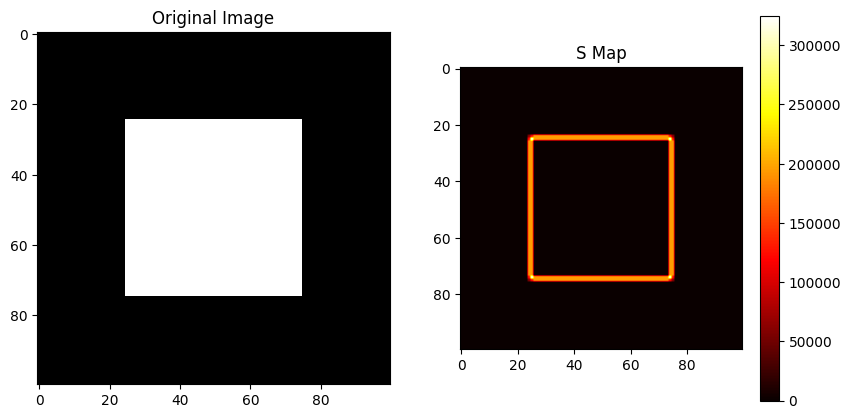

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def moravec_corner_detection(image, window_size=3, threshold=100):
    height, width = image.shape
    corners = np.zeros((height, width))
    
    # 모라벡 윈도우 설정
    offset = window_size // 2
    
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # 윈도우 내 픽셀 간의 차이 제곱을 계산
            window = image[y - offset:y + offset + 1, x - offset:x + offset + 1]
            differences = np.sum((window - image[y, x]) ** 2)
            corners[y, x] = differences
    
    # 각 픽셀의 모라벡 응답을 기반으로 코너를 결정
    corners[corners < threshold] = 0
    
    return corners

# 이미지 생성
image = np.zeros((100, 100))
image[25:75, 25:75] = 255  # 중앙에 흰색 사각형 생성

# 모라벡 알고리즘을 사용하여 S 맵 생성
s_map = moravec_corner_detection(image)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(s_map, cmap='hot')
plt.title('S Map')
plt.colorbar()
plt.show()


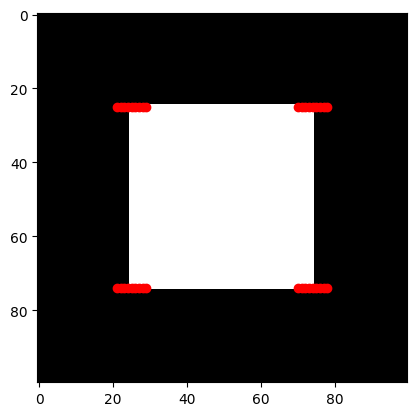

In [15]:
def harris_corner(image, threshold=0.1):
    h = harris(image)
    corners = []
    for i in range(1, h.shape[0] - 1):
        for j in range(1, h.shape[1] - 1):
            if h[i, j] > threshold:
                corners.append((i, j))
    return corners

corners = harris_corner(image, 2.5)
corners = np.array(corners)
plt.imshow(image, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], color='red')

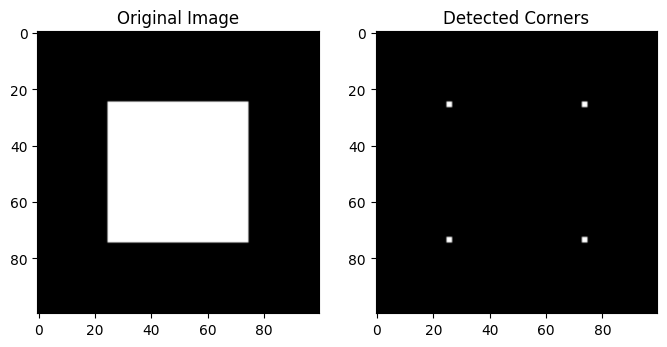

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def harris_corner_detection(image, threshold=0.1):
    # 이미지의 x 및 y 방향의 그래디언트 계산
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    Ix = convolve(image, sobel_x)
    Iy = convolve(image, sobel_y)
    
    # Harris 코너 응답 함수 계산
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy
    
    height, width = image.shape
    window_size = 3  # 윈도우 크기
    
    offset = window_size // 2
    corner_response = np.zeros((height, width))
    
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # 윈도우 내의 Ixx, Iyy, Ixy의 합 계산
            Sxx = np.sum(Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1])
            Syy = np.sum(Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1])
            Sxy = np.sum(Ixy[y - offset:y + offset + 1, x - offset:x + offset + 1])
            
            # Harris 코너 응답 함수 계산
            det = (Sxx * Syy) - (Sxy ** 2)
            trace = Sxx + Syy
            corner_response[y, x] = det - 0.04 * (trace ** 2)
    
    # 응답 함수에서 코너 식별
    corners = (corner_response > threshold * corner_response.max()) * 1
    
    return corners

# 주어진 이미지 생성
image = np.zeros((12, 12))
image[3, 3:4] = 1
image[4, 3:5] = 1
image[5, 3:6] = 1
image[6, 3:7] = 1
image[7, 3:8] = 1

image = np.zeros((100, 100))
image[25:75, 25:75] = 255  # 중앙에 흰색 사각형 생성

# Harris 코너 감지 수행
corners = harris_corner_detection(image, 0.5)

# 결과 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='gray')
plt.title('Detected Corners')
plt.show()


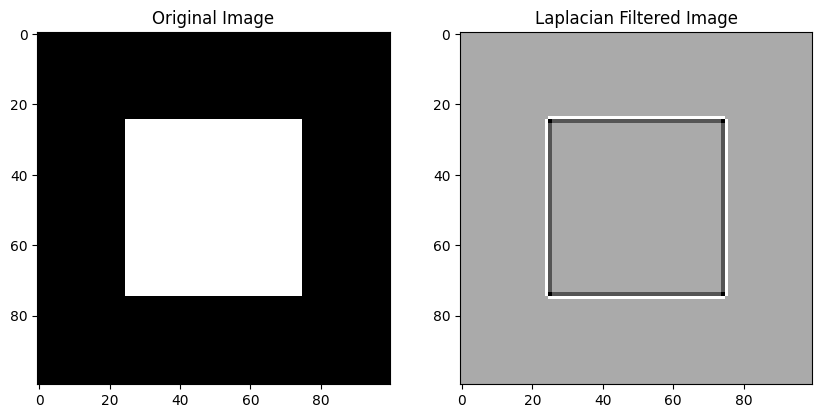

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def laplacian_filter(image):
    # 라플라시안 필터 정의
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    
    # 이미지에 라플라시안 필터 적용
    laplacian_result = convolve(image, laplacian_kernel)
    
    return laplacian_result

# 테스트용 이미지 생성
image = np.zeros((100, 100))
image[25:75, 25:75] = 255  # 중앙에 흰색 사각형 생성

# 라플라시안 필터 적용
laplacian_result = laplacian_filter(image)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.show()
